In [1]:
import numpy as np
import pandas as pd
# Visualización
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sounddevice as sd
import pyaudio
import wave
import hapticx as hapticx

# importing matplotlib modules
import matplotlib.image as mpimg 
import cv2

import math
#solo con el ojo derecho veo las cosas más a la izquierda
#con el ojo izq veo las cosas más a la derecha.


from scipy.fftpack import fft
#Fourier

In [2]:
a = 4
fi = 220
#44100
sample_rate = 44100
amplitud0 = 0.2
duracion = 1
#si es una sola imagen:

In [3]:
# Read Images
vista_derecha = mpimg.imread(f'paisaje_pix.jpg')
vista_izquierda = mpimg.imread( f'paisaje_pix.jpg') 
#variables[f'vista_derecha_r_{A}'] = vista_derecha
#variables[f'vista_izquierda_r_{A}'] = vista_izquierda
    #Pasarlo a csv
# Output Images
#plt.imshow(vista_izquierda)
#plt.show()

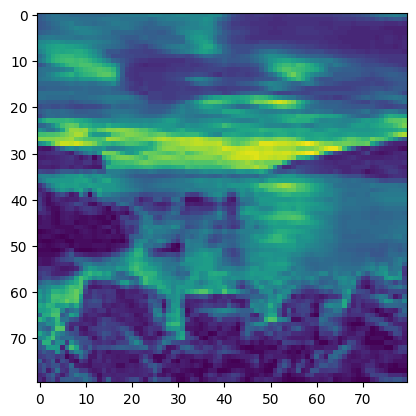

In [4]:
perdida_resolucion = hapticx.perdida_resolucion(pd.DataFrame(vista_derecha),a)
plt.imshow(perdida_resolucion)
plt.show()
#eso es lo que "vería" la persona que utilice este dispositivo

In [5]:
vista_derecha.shape

(80, 80)

In [189]:
#En esta versión suma todos los pixeles
#El sonido de toda la imagen simultáneamente, no separado por acordes

vista_derecha = variables[f'vista_derecha_r_{A}']
vista_izquierda = variables[f'vista_izquierda_r_{A}']
df_derecho_0 = pd.DataFrame(vista_derecha)
df_izquierdo_0 = pd.DataFrame(vista_izquierda)#data frame de pixekes
frecuencias_derecha = hapticx.intensidad_to_freq(df_derecho_0, a, fi) #data frame de frecuencias
frecuencias_izquierda = hapticx.intensidad_to_freq(df_izquierdo_0, a, fi) #data frame de frecuencias
#data frame de sonidos de frecuencias
señales_derecho = hapticx.generate_sound_df(frecuencias_derecha, duracion, amplitud0, sample_rate)
señales_izquierdo = hapticx.generate_sound_df(frecuencias_izquierda, duracion, amplitud0, sample_rate)
sonido_por_columnas_derecha = [] #lista de listas, cada sublista contiene la suma de 
#todas las señales de una misma columna.
#si los sonidos son consecutivos por filas o columnas no sería necesario inducir diferencias de volumen?

for column in señales_derecho.columns:
    c = np.zeros(sample_rate) #sonido por columna
    for j in señales_derecho[column]:
        c += j
    sonido_por_columnas_derecha.append(c)
#########################

sonido_por_columnas_izquierda = [] #lista de listas, cada sublista contiene la suma de 
#todas las señales de una misma columna.
#si los sonidos son consecutivos por filas o columnas no sería necesario inducir diferencias de volumen?
for column in señales_izquierdo.columns:
    c = np.zeros(sample_rate) #sonido por columna
    for j in señales_izquierdo[column]:
        c += j
    sonido_por_columnas_izquierda.append(c)
###########################

sonido_imagen_completa_derecha = np.zeros(sample_rate)
for i in sonido_por_columnas_derecha:
    sonido_imagen_completa_derecha += i
#play_sound(sonido_imagen_completa_derecha, sample_rate)

sonido_imagen_completa_izquierda = np.zeros(sample_rate)
for i in sonido_por_columnas_izquierda:
    sonido_imagen_completa_izquierda += i
#play_sound(sonido_imagen_completa_izquierda, sample_rate)

#play_sound_stereo_ambas(sonido_imagen_completa_derecha, sonido_imagen_completa_izquierda, sample_rate)

NameError: name 'variables' is not defined

In [6]:
#En esta versión suma entre pixeles que tienen frecuencia que forma acordes

#vista_derecha = variables[f'vista_derecha_r_{A}']
#vista_izquierda = variables[f'vista_izquierda_r_{A}']
df_derecho_0 = pd.DataFrame(vista_derecha)
df_izquierdo_0 = pd.DataFrame(vista_izquierda)#data frame de pixekes
frecuencias_derecha = hapticx.intensidad_to_freq(df_derecho_0, a, fi) #data frame de frecuencias
frecuencias_izquierda = hapticx.intensidad_to_freq(df_izquierdo_0, a, fi) #data frame de frecuencias
#data frame de sonidos de frecuencias
señales_derecho = hapticx.generate_sound_df(frecuencias_derecha, duracion, amplitud0, sample_rate)
señales_izquierdo = hapticx.generate_sound_df(frecuencias_izquierda, duracion, amplitud0, sample_rate)

##################################################################
##################################################################
diccionario_derecha = {}

for column in frecuencias_derecha.columns:
    for index, value in frecuencias_derecha[column].items():
        if value not in diccionario_derecha:
            diccionario_derecha[value] = []
        diccionario_derecha[value].append((column, index))
#--------------------------------------------------------------        

diccionario_izquierda = {}

for column in frecuencias_izquierda.columns:
    for index, value in frecuencias_izquierda[column].items():
        if value not in diccionario_izquierda:
            diccionario_izquierda[value] = []
        diccionario_izquierda[value].append((column, index))
#--------------------------------------------------------------

#sumar todos los que tengan la misma frecuencia
#cada columna del data frame tendrá la suma
#sonidos cambia a "signal_misma_freq_derecha"
signal_misma_freq_derecha = pd.DataFrame()
c = np.zeros(sample_rate)
for freq in diccionario_derecha:
    c = np.zeros(sample_rate)
    lista_sonidos = []
    #diccionario[key] #lista de posiciones con cada frecuencia
    for posicion in diccionario_derecha[freq]:
        columna = posicion[0]
        fila = posicion[1]
        c += señales_derecho.loc[columna, fila]
    signal_misma_freq_derecha[freq] = c

#-------------------------------------------------------------
#sumar todos los que tengan la misma frecuencia
#cada columna del data frame tendrá la suma
#sonidos cambia a "signal_misma_freq_derecha"
signal_misma_freq_izquierda = pd.DataFrame()
sample_rate2 = 4*sample_rate #para que suene en menos tiempo
c = np.zeros(sample_rate)
for freq in diccionario_izquierda:
    c = np.zeros(sample_rate)
    lista_sonidos = []
    #diccionario[key] #lista de posiciones con cada frecuencia
    for posicion in diccionario_izquierda[freq]:
        columna = posicion[0]
        fila = posicion[1]
        c += señales_izquierdo.loc[columna, fila]
    signal_misma_freq_izquierda[freq] = c

#-------------------------------------------


acordes_final_derecha = []
sonidos = signal_misma_freq_derecha
for i in sonidos.columns:#Me queda claro que el ciclo no se actualiza al actualizarse sonidos.columns.-------
    margin  = 0.1 #dentro del 10%
    acorde_ideal1 = [i*1.5, i*1.25]
    acorde_ideal2 = [i*12/10, i*4/5]
    try:
        sonido_acorde = np.array(sonidos[i])#sera la suma de todos los sonidos que suenan bien
        sonidos.drop(i,axis = 1, inplace=True)
    except:
        continue  # Saltar a la siguiente iteración del bucle

    try:
        for j in acorde_ideal1:
            if hapticx.is_within_some_margin(j, sonidos.columns, margin):
                freq = hapticx.is_within_some_margin(j, sonidos.columns, margin)
                sonido_acorde += np.array(sonidos[freq])
                sonidos.drop(freq,axis = 1, inplace = True)
        for j in acorde_ideal2:
            if hapticx.is_within_some_margin(j, sonidos.columns, margin):
                freq = hapticx.is_within_some_margin(j, sonidos.columns, margin)
                sonido_acorde += np.array(sonidos[freq])
                sonidos.drop(freq,axis = 1, inplace = True)
    except:
        pass
    acordes_final_derecha.append(sonido_acorde)

    #------------------------------------------

acordes_final_izquierda = []
sonidos = signal_misma_freq_izquierda
for i in sonidos.columns:#Me queda claro que el ciclo no se actualiza al actualizarse sonidos.columns.-------
    margin  = 0.01 #dentro del 1%
    acorde_ideal1 = [i*1.5, i*1.25]
    acorde_ideal2 = [i*12/10, i*4/5]
    try:
        sonido_acorde = np.array(sonidos[i])#sera la suma de todos los sonidos que suenan bien
        sonidos.drop(i,axis = 1, inplace=True)
    except:
        continue  # Saltar a la siguiente iteración del bucle

    try:
        for j in acorde_ideal1:
            if is_within_some_margin(j, sonidos.columns, margin):
                freq = is_within_some_margin(j, sonidos.columns, margin)
                sonido_acorde += np.array(sonidos[freq])
                sonidos.drop(freq,axis = 1, inplace = True)
        for j in acorde_ideal2:
            if is_within_some_margin(j, sonidos.columns, margin):
                freq = is_within_some_margin(j, sonidos.columns, margin)
                sonido_acorde += np.array(sonidos[freq])
                sonidos.drop(freq,axis = 1, inplace = True)
    except:
        pass
    acordes_final_izquierda.append(sonido_acorde)
    #for i in acordes_final_derecha:
    #    play_sound(i, sample_rate)
    #para guardar este sonido primero concatenar los acordes i en el for

#----------------------------------------------------

suma_todas_señales_derecha = np.zeros(2*sample_rate)#modificacion
suma_todas_señales_derecha[:sample_rate] = acordes_final_derecha[0]

for i in acordes_final_derecha[1:]:
    suma_todas_señales_derecha[sample_rate:] += i


suma_todas_señales_izquierda = np.zeros(2*sample_rate)#modificacion
suma_todas_señales_izquierda[:sample_rate] = acordes_final_izquierda[0]

for i in acordes_final_izquierda[1:]:
    suma_todas_señales_izquierda[sample_rate:] += i


#------------------------
hapticx.save_audio_stereo(suma_todas_señales_derecha, suma_todas_señales_izquierda, sample_rate, 'tucan_sound')
#sonar primero el que tiene mayor amplitud, por lo general acordes_final_derecha[0]
#no es correcto colocar 2*samplerate acá pues el script para guardar el audio reconoce la longitud de las señales
#utiliza samplerate para saber cuántos registros son por segundo.Justamente quiero que tarde 2 segundos.
#---------------------------------------------
#print(max(frecuencias_derecha))


##################################################################
##################################################################

#play_sound_stereo_ambas(sonido_imagen_completa_derecha, sonido_imagen_completa_izquierda, sample_rate)

In [7]:
max(frecuencias_derecha.values[20])

3135.9634878539946

In [8]:
len(suma_todas_señales_derecha)

88200

<Axes: >

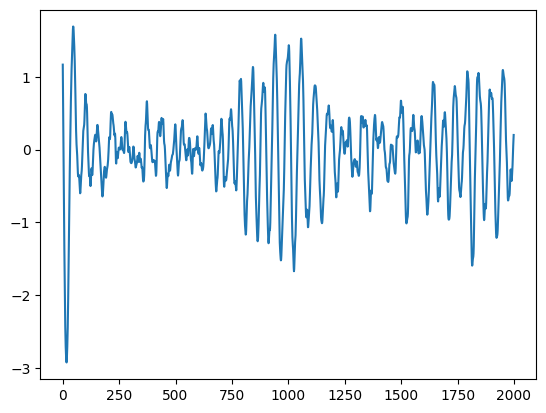

In [9]:
sns.lineplot(acordes_final_derecha[0][:2000])

<Axes: >

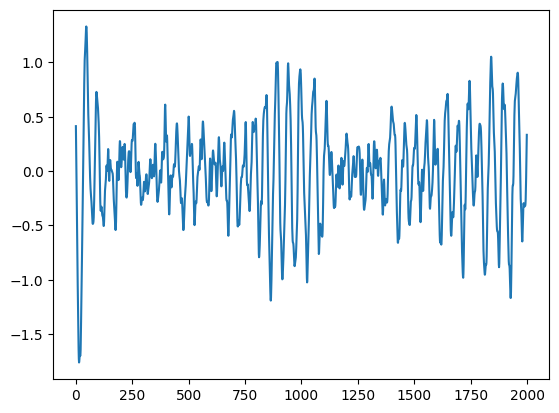

In [10]:
sns.lineplot(acordes_final_derecha[1][:2000])

In [11]:
suma_todas_señales_derecha = np.zeros(2*sample_rate)#modificacion
suma_todas_señales_derecha[:sample_rate] = acordes_final_derecha[0]
for i in acordes_final_derecha[1:]:
    suma_todas_señales_derecha[sample_rate:] += i


<Axes: >

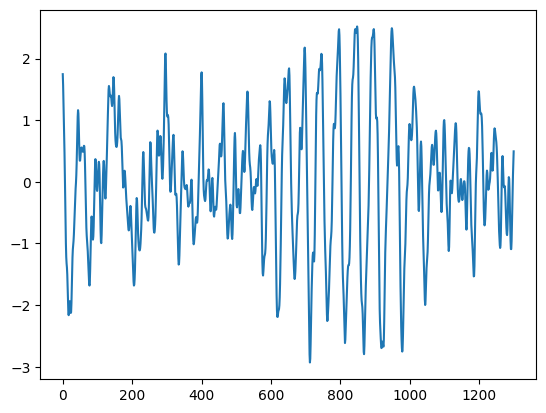

In [12]:
sns.lineplot(suma_todas_señales_derecha[44200:45500])

<Axes: >

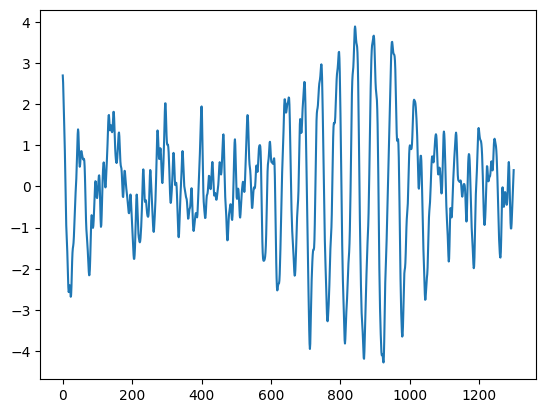

In [13]:
sns.lineplot(suma_todas_señales_izquierda[44200:45500])

In [14]:
#si es menor a 100 entonces es 0
#mayor a 100 entonces 255
#df_derecho = df_derecho_0.applymap(lambda x: 0 if x < 100 else 255)
#df_izquierdo = df_izquierdo_0.applymap(lambda x: 0 if x < 100 else 255)#data frame de pixeles o 0 o 255

#df.applymap(lambda x: 0 if x < 100 else 255)[30].unique() #transf correcta pero no es inplace
#df_derecho
#plt.imshow(df_derecho)
#plt.show()

In [15]:
# Generar una lista de columnas a eliminar (del 10 al 100)
#columnas_a_eliminar = list(map(str, range(10, 101)))
#columnas_a_eliminar = list(range(200,1470))
#columnas_a_eliminar2 = list(range(1200, 1922))
#columnas_a_eliminar
#para tener una imagen más pequeña
#df2 = df#[0:200].drop(columns=(columnas_a_eliminar))#+columnas_a_eliminar2))


In [16]:
#for i in range(10, len(señales_izquierdo), 10):
#    plt.plot(señales_izquierdo[i][i][0:100], label = str(i))
#plt.legend()
#plt.show()

#se muestran cuatro curvas, dos de ellas se traslapan
#porque tienen la misma distancia
#solo dif posicion.
#acá verifico que sí disminuya la intensidad con la distancia.
#el problema es que disminuy en varios órdenes de magnitud(no audibles?) para rangos visibles del mismo orden
#de magnitud

In [17]:
#al utilizar sample rate de 10K no tenína buenos valores para la frec de 8372

In [18]:
#np.shape(acordes_final_derecha),np.shape(sonido_acorde)

In [19]:
len(acordes_final_derecha)

19

In [27]:
for i,j in zip(acordes_final_derecha, acordes_final_izquierda):
    hapticx.play_sound_stereo_ambas(i[:4410],j[:4410],sample_rate, "a")

In [26]:
for i,j in zip(acordes_final_derecha, acordes_final_izquierda):
    hapticx.play_sound_stereo_ambas(i[:8820],j[:8820],sample_rate, "a")

In [150]:
#for i,j in zip(acordes_final_derecha, acordes_final_izquierda):
#    hapticx.play_sound_stereo_ambas(i[:20000],j[:20000],sample_rate, "a")

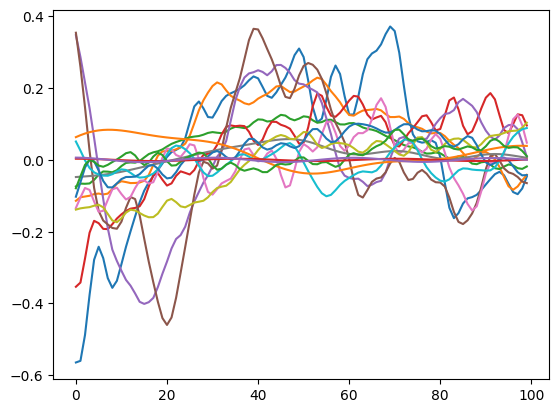

In [207]:
for i in range(10, len(acordes_final_derecha)):
    sns.lineplot(acordes_final_derecha[i][0:100])

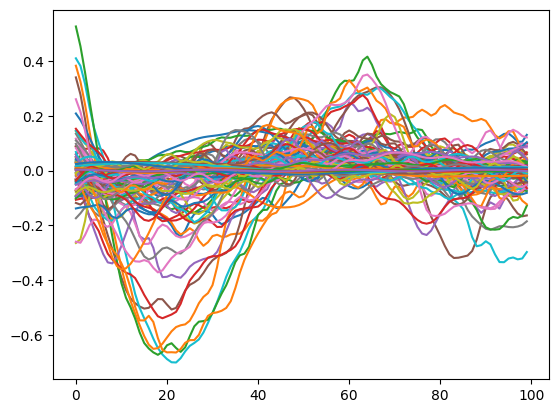

In [208]:
for i in range(0, len(acordes_final_izquierda)):
    sns.lineplot(acordes_final_izquierda[i][0:100])

In [209]:
hapticx.play_sound_stereo_ambas(suma_todas_señales_derecha, suma_todas_señales_izquierda, sample_rate, "b")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


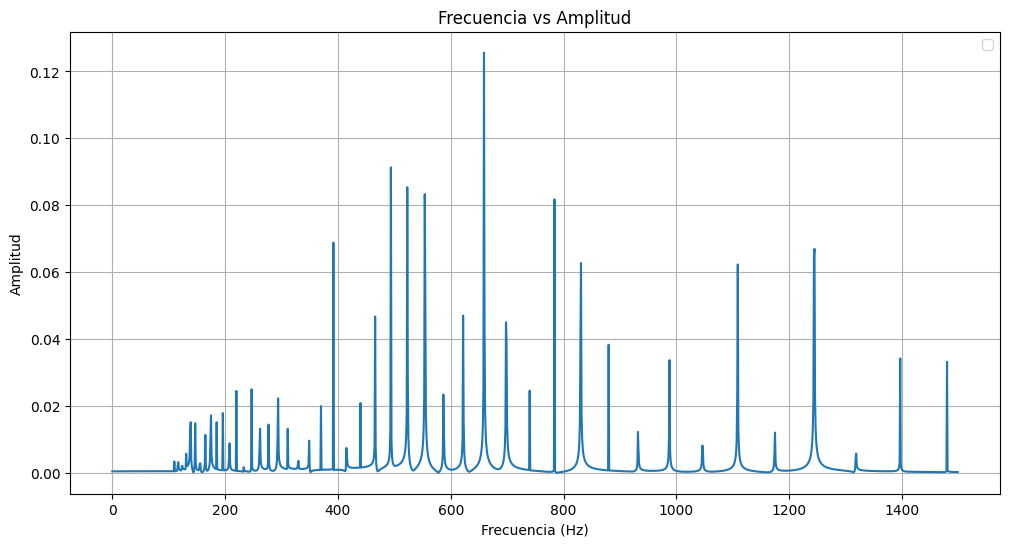

In [210]:
# Ejemplo de array de sonido (puedes reemplazar esto con tu propio array)
# Por ejemplo, un sonido de muestra de 1 segundo a una frecuencia de muestreo de 8000 Hz
#sample_rate = 10000 # Frecuencia de muestreo en Hz
#t = np.linspace(0, 1.0, sample_rate)
#frequency = 440.0  # Frecuencia del sonido (A4)
columnas = sonidos.columns
sound_data = np.array(acordes_final_derecha[5])

# Calcular la Transformada de Fourier
n = len(sound_data)
yf = fft(sound_data)
xf = np.fft.fftfreq(n, 1 / sample_rate)

# Solo utilizar la mitad positiva de las frecuencias
xf = xf[:n // 2]
yf = 2.0 / n * np.abs(yf[:n // 2])

# Plotear las frecuencias y sus amplitudes
plt.figure(figsize=(12, 6))
plt.plot(xf[:1500], yf[:1500])
#plt.plot(xf, yf)
plt.title("Frecuencia vs Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


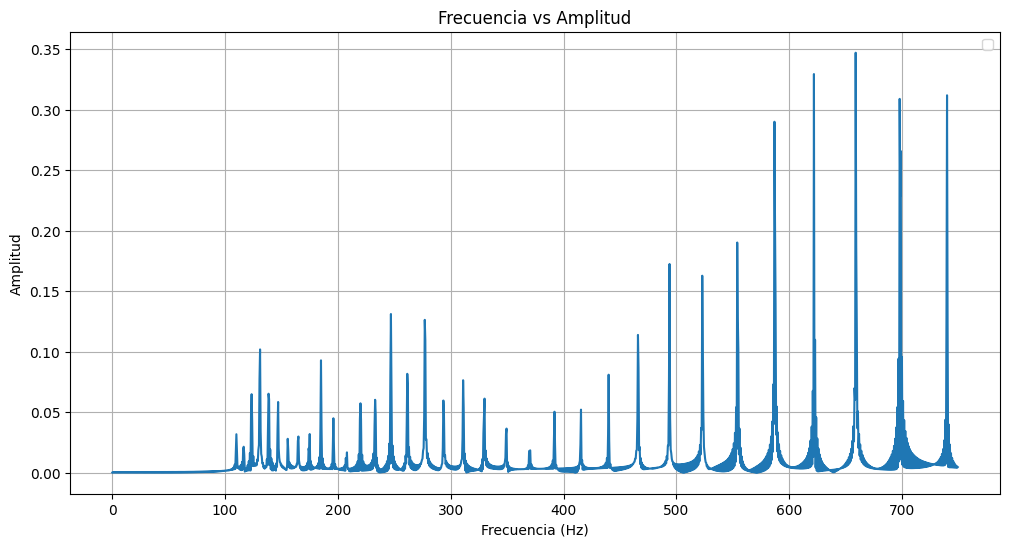

In [211]:
# Ejemplo de array de sonido (puedes reemplazar esto con tu propio array)
# Por ejemplo, un sonido de muestra de 1 segundo a una frecuencia de muestreo de 8000 Hz
#sample_rate = 10000 # Frecuencia de muestreo en Hz
#t = np.linspace(0, 1.0, sample_rate)
#frequency = 440.0  # Frecuencia del sonido (A4)
columnas = sonidos.columns
sound_data = np.array(suma_todas_señales_derecha)

# Calcular la Transformada de Fourier
n = len(sound_data)
yf = fft(sound_data)
xf = np.fft.fftfreq(n, 1 / sample_rate)

# Solo utilizar la mitad positiva de las frecuencias
xf = xf[:n // 2]
yf = 2.0 / n * np.abs(yf[:n // 2])

# Plotear las frecuencias y sus amplitudes
plt.figure(figsize=(12, 6))
plt.plot(xf[:1500], yf[:1500])
#plt.plot(xf, yf)
plt.title("Frecuencia vs Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


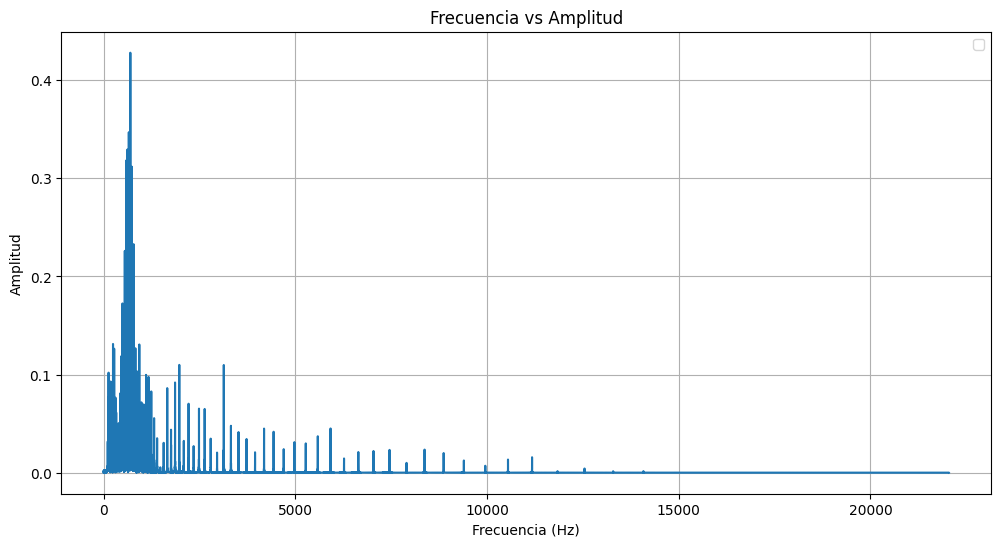

In [212]:
# Ejemplo de array de sonido (puedes reemplazar esto con tu propio array)
# Por ejemplo, un sonido de muestra de 1 segundo a una frecuencia de muestreo de 8000 Hz
#sample_rate = 10000 # Frecuencia de muestreo en Hz
#t = np.linspace(0, 1.0, sample_rate)
#frequency = 440.0  # Frecuencia del sonido (A4)
columnas = sonidos.columns
sound_data = np.array(suma_todas_señales_izquierda)

# Calcular la Transformada de Fourier
n = len(sound_data)
yf = fft(sound_data)
xf = np.fft.fftfreq(n, 1 / sample_rate)

# Solo utilizar la mitad positiva de las frecuencias
xf = xf[:n // 2]
yf = 2.0 / n * np.abs(yf[:n // 2])

# Plotear las frecuencias y sus amplitudes
plt.figure(figsize=(12, 6))
plt.plot(xf, yf)
#plt.plot(xf, yf)
plt.title("Frecuencia vs Amplitud")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()
plt.show()


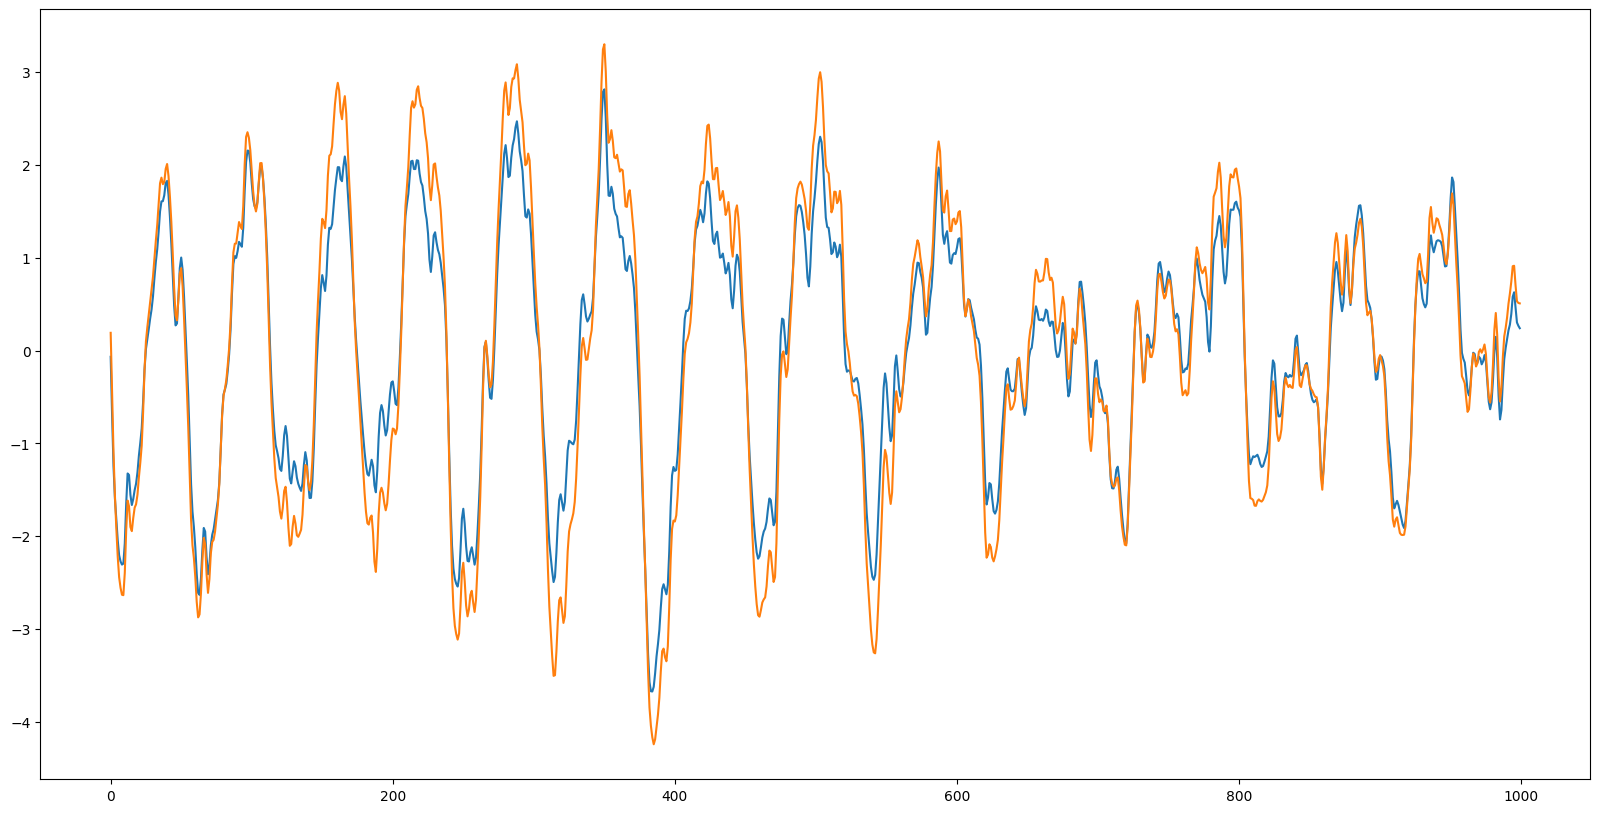

In [213]:
figure = plt.figure(figsize=(20,10))
sns.lineplot(suma_todas_señales_derecha[45000:46000])
sns.lineplot(suma_todas_señales_izquierda[45000:46000])
#Deberían de ser idénticos
plt.show()

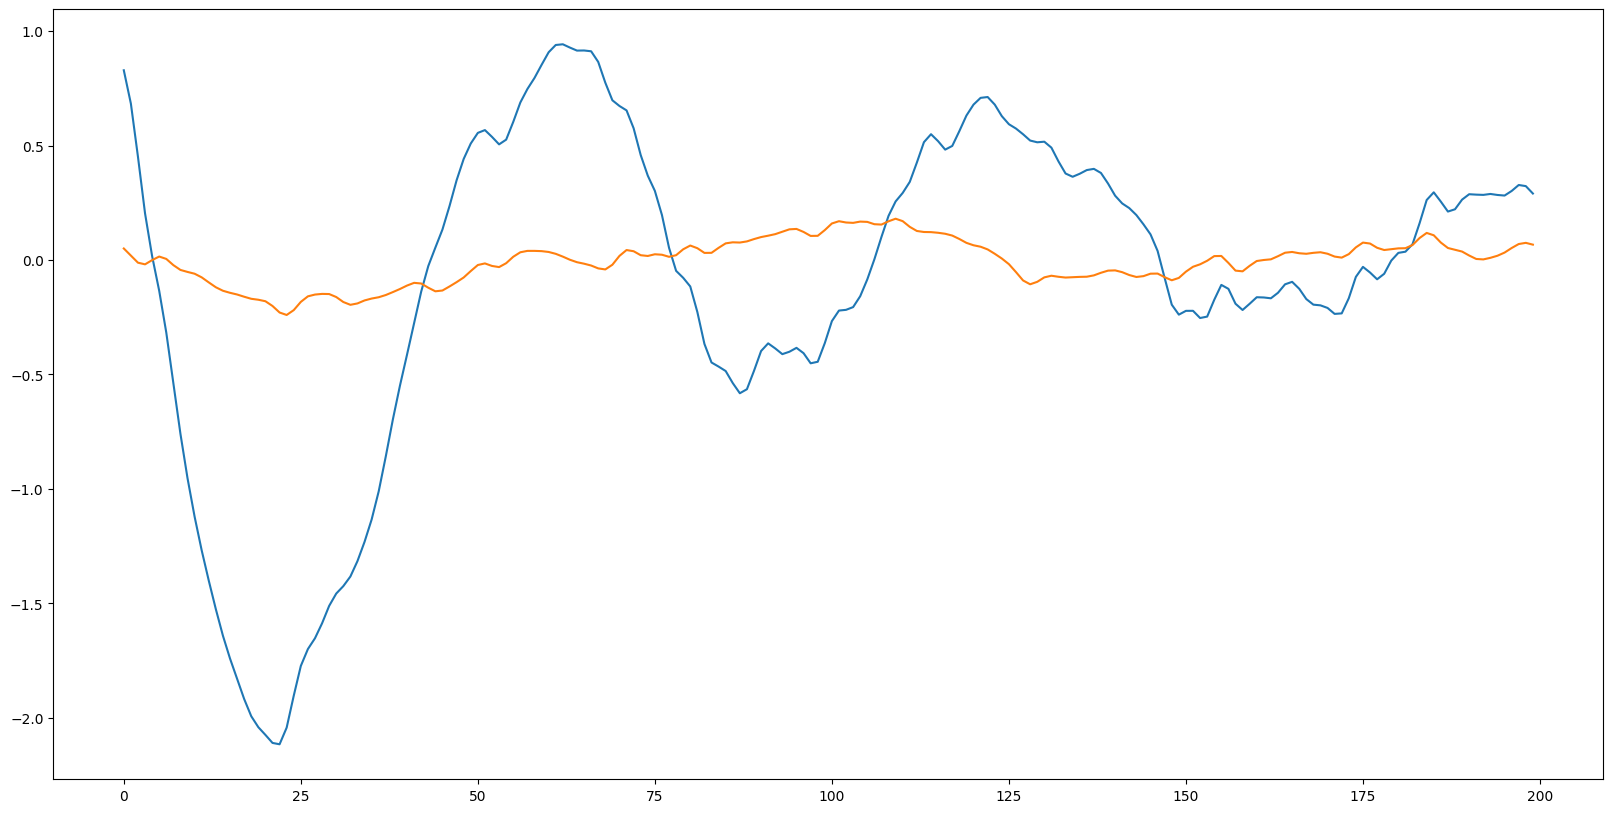

In [215]:
figure = plt.figure(figsize=(20,10))
sns.lineplot(suma_todas_señales_derecha[:200])
sns.lineplot(suma_todas_señales_izquierda[:200])
#Deberían de ser idénticos
#acá no lo son
plt.show()